<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/10wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상 

{{<video ???? >}}

# 2. Imports

In [1]:
# !pip install yfinance
import numpy as np 
import pandas as pd 
import yfinance as yf

# 3. `yfinance`를 이용한 주식자료 시각화

## A. 크롤링 + 데이터정리 

`-` yahoo finance: https://finance.yahoo.com/

**Apple: `'AAPL'`**

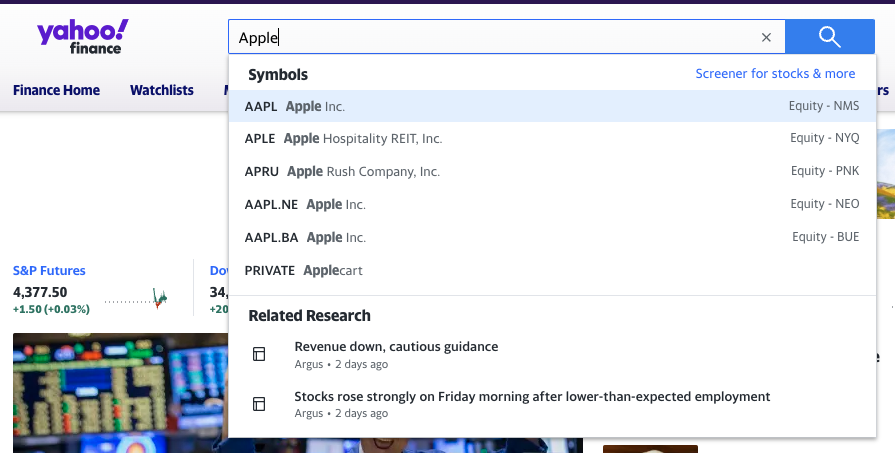

**삼성전자: `'005930.KS'`**

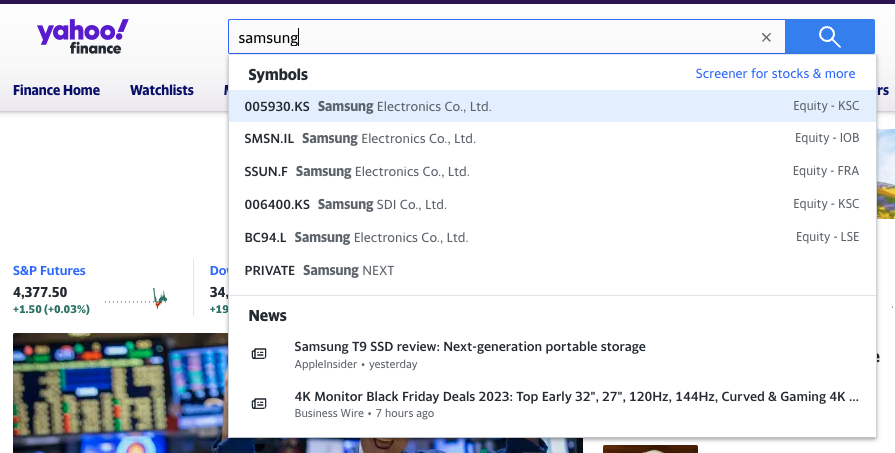

`-` 크롤링을 위한 코드 

In [2]:
symbols = ['AMZN','AAPL','GOOG','MSFT','NFLX','NVDA','TSLA']
start = '2020-01-01'
end = '2023-11-06'
df = yf.download(symbols,start,end)

[*********************100%%**********************]  7 of 7 completed


`-` 데이터를 살펴보자. 

In [3]:
df.stack()

Adj Close       Close        High         Low        Open  \
Date                                                                          
2020-01-02 AAPL   73.249023   75.087502   75.150002   73.797501   74.059998   
           AMZN   94.900497   94.900497   94.900497   93.207497   93.750000   
           GOOG   68.368500   68.368500   68.406998   67.077499   67.077499   
           MSFT  155.093674  160.619995  160.729996  158.330002  158.779999   
           NFLX  329.809998  329.809998  329.980011  324.779999  326.100006   
...                     ...         ...         ...         ...         ...   
2023-11-03 GOOG  130.369995  130.369995  130.729996  129.009995  129.089996   
           MSFT  352.799988  352.799988  354.390015  347.329987  349.630005   
           NFLX  432.359985  432.359985  434.820007  425.529999  428.760010   
           NVDA  450.049988  450.049988  453.089996  437.230011  440.200012   
           TSLA  219.960007  219.960007  226.369995  218.399994  221.149994   

                    Volume  
Date                        
2020-01-02 AAPL  135480400  
           AMZN   80580000  
           GOOG   28132000  
           MSFT   22622100  
           NFLX    4485800  
...                    ...  
2023-11-03 GOOG   19517900  
           MSFT   23624000  
           NFLX    3664800  
           NVDA   42385500  
           TSLA  119281000  

[6776 rows x 6 columns]

:::{.callout-note}

### ChatGPT

"Adj Close"는 "Adjusted Closing Price"를 의미합니다. 주식 시장에서 각 거래일의 마감 가격을 조정하여 나타낸 값입니다. "조정"이라는 용어는 주식 분할, 배당금 지급, 자본 변동과 같은 기업 활동을 반영하여 가격을 수정한 것을 의미합니다. 이는 투자자들이 시간이 지나면서 주식의 실제 성과를 더 정확히 비교할 수 있게 해줍니다.

"Close"는 해당 거래일에 주식 시장이 닫힐 때의 주식 가격입니다.

다른 열은 다음을 의미합니다:

- "High"는 해당 거래일에 주식이 거래된 최고 가격입니다.
- "Low"는 해당 거래일에 주식이 거래된 최저 가격입니다.
- "Open"은 주식 시장이 개장했을 때의 주식 가격입니다.
- "Volume"은 그 날에 거래된 주식의 총 수량입니다.

표는 다양한 날짜에 대한 여러 주요 기술 회사들(예: AAPL - Apple Inc., AMZN - Amazon.com Inc., GOOG - Alphabet Inc., MSFT - Microsoft Corporation, NFLX - Netflix Inc., NVDA - NVIDIA Corporation, TSLA - Tesla Inc.)의 주식 정보를 보여줍니다.
:::

`-` `Adj Close`만을 선택 

In [4]:
df.stack().loc[:,'Adj Close']

Date            
2020-01-02  AAPL     73.249023
            AMZN     94.900497
            GOOG     68.368500
            MSFT    155.093674
            NFLX    329.809998
                       ...    
2023-11-03  GOOG    130.369995
            MSFT    352.799988
            NFLX    432.359985
            NVDA    450.049988
            TSLA    219.960007
Name: Adj Close, Length: 6776, dtype: float64

`-` `Adj Close`만을 선택 -- 또 다른 방법 (일단 이거로 할게요)

In [5]:
df.loc[:,'Adj Close'] # 이린식도 가능함 -- 일단 이걸로..

AAPL        AMZN        GOOG        MSFT        NFLX  \
Date                                                                     
2020-01-02   73.249023   94.900497   68.368500  155.093674  329.809998   
2020-01-03   72.536888   93.748497   68.032997  153.162460  325.899994   
2020-01-06   73.114876   95.143997   69.710503  153.558365  335.829987   
2020-01-07   72.771027   95.343002   69.667000  152.158264  330.750000   
2020-01-08   73.941635   94.598503   70.216003  154.581924  339.260010   
...                ...         ...         ...         ...         ...   
2023-10-30  170.289993  132.710007  125.750000  337.309998  410.079987   
2023-10-31  170.770004  133.089996  125.300003  338.109985  411.690002   
2023-11-01  173.970001  137.000000  127.570000  346.070007  420.190002   
2023-11-02  177.570007  138.070007  128.580002  348.320007  424.709991   
2023-11-03  176.649994  138.600006  130.369995  352.799988  432.359985   

                  NVDA        TSLA  
Date                                
2020-01-02   59.749294   28.684000  
2020-01-03   58.792946   29.534000  
2020-01-06   59.039509   30.102667  
2020-01-07   59.754272   31.270666  
2020-01-08   59.866352   32.809334  
...                ...         ...  
2023-10-30  411.609985  197.360001  
2023-10-31  407.799988  200.839996  
2023-11-01  423.250000  205.660004  
2023-11-02  435.059998  218.509995  
2023-11-03  450.049988  219.960007  

[968 rows x 7 columns]

## B. 시각화 

`-` tidydata를 생성 

In [6]:
df.loc[:,'Adj Close'].reset_index().melt(id_vars='Date').set_axis(['Date','Company','Price'],axis=1)

Date Company       Price
0    2020-01-02    AAPL   73.249023
1    2020-01-03    AAPL   72.536888
2    2020-01-06    AAPL   73.114876
3    2020-01-07    AAPL   72.771027
4    2020-01-08    AAPL   73.941635
...         ...     ...         ...
6771 2023-10-30    TSLA  197.360001
6772 2023-10-31    TSLA  200.839996
6773 2023-11-01    TSLA  205.660004
6774 2023-11-02    TSLA  218.509995
6775 2023-11-03    TSLA  219.960007

[6776 rows x 3 columns]

`-` 바로 이어서 시각화! -- `x='Date', y='Price', color='Company'`

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


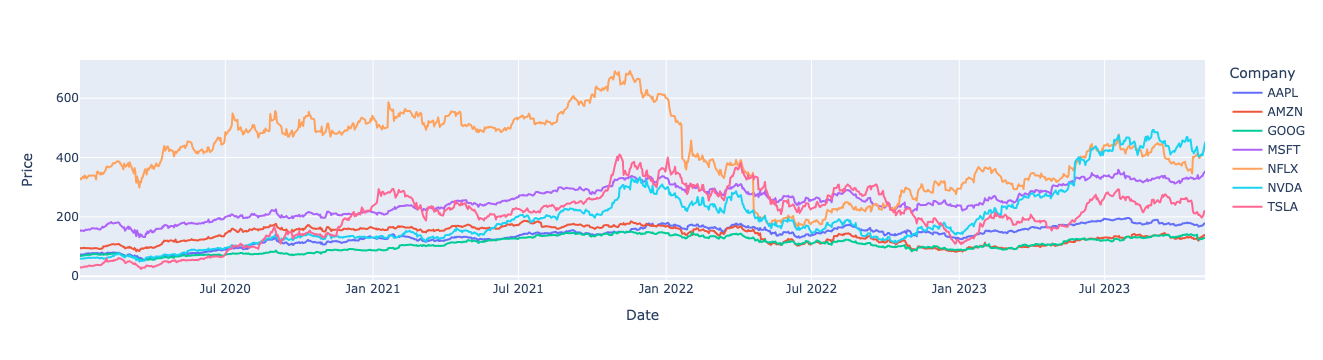

In [7]:
df.loc[:,'Adj Close'].reset_index().melt(id_vars='Date').set_axis(['Date','Company','Price'],axis=1)\
.plot.line(x='Date',y='Price',color='Company',backend='plotly')

# 사실 아래 코드도 가능
# df.loc[:,'Adj Close'].reset_index().melt(id_vars='Date').set_axis(['Date','Company','Price'],axis=1)\
# .plot(x='Date',y='Price',color='Company',backend='plotly') #

# 4. 출산율 시각화 

## A. 크롤링 + 데이터정리 

`-` 대한민국의 저출산문제

ref: <https://ko.wikipedia.org/wiki/대한민국의_저출산>

`-` 위의 url에서 3,5번째 테이블을 읽고싶다. 

- 3번째 테이블: 시도별 출산율 
- 5번째 테이블: 시도별 출생아 수

In [8]:
df_lst = pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%A0%80%EC%B6%9C%EC%82%B0')

In [9]:
df = df_lst[4]

In [10]:
display(df)

지역/연도[6]    2010    2011        2012        2013        2014    2015  \
0        서울   93266   91526   93914.000   84066.000   83711.000   83005   
1        부산   27415   27759   28673.000   25831.000   26190.000   26645   
2        대구   20557   20758   21472.000   19340.000   19361.000   19438   
3        인천   25752   20758   21472.000   25560.000   25786.000   25491   
4        광주   13979   13916   14392.000   12729.000   12729.000   12441   
5        대전   14314   14808   15279.000   14099.000   13962.000   13774   
6        울산   11432   11542   12160.000   11330.000   11556.000   11732   
7        세종       -       -    1054.000    1111.000    1344.000    2708   
8        경기  121753  122027  124746.000  112129.000     112.169  113495   
9        강원   12477   12408   12426.000   10980.000   10662.000   10929   
10       충북   14670   14804   15139.000   13658.000   13366.000   13563   
11       충남  20.242  20.398      20.448      18.628   18200.000   18604   
12       전북   16100   16175   16238.000   14555.000   14231.000   14087   
13       전남   16654   16612   16990.000   15401.000   14817.000   15061   
14       경북   23700   24250   24635.000   22206.000   22062.000   22310   
15       경남   32203   32536   33211.000   29504.000   29763.000   29537   
16       제주    5657    5628    5992.000    5328.000    5526.000    5600   
17       전국  470171  471265  484550.000  436455.000  435435.000  438420   

          2016    2017    2018        2019    2020    2021  
0       75.536   65389   58074      53.673   47400   45531  
1    24906.000   21480   19152   17049.000   15100   14446  
2    18298.000   15946   14400   13233.000   11200   10661  
3    23609.000   20445   20087   18522.000   16000   14947  
4    11580.000   10120    9105    8364.000    7300    7956  
5    12436.000   10851    9337    8410.000    7500    7414  
6    10910.000    9381    8149    7539.000    6600    6127  
7     3297.000    3504    3703    3819.000    3500    3570  
8   105643.000   94088   83198      83.198   77800   76139  
9    10058.000    9958    8351    8283.000    7800    7357  
10   12742.000   11394   10586    9333.000    8600    8190  
11   17302.000   15670   14380   13228.000   11900   10984  
12   12698.000   11348   10001    8971.000    8200    7745  
13   13980.000   12354   11238   10832.000    9700    8430  
14   20616.000   17957   16079   14472.000   12900   12045  
15   27138.000   23849   21224   19250.000   16800   15562  
16    5494.000    5037    4781    4500.000    4000    3728  
17  406243.000  357771  326822  302676.000  272400  260562

- `-`로 표현된 값을 0으로 처리하는게 좋겠음 

In [11]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역']).applymap(lambda x: float(x) if not x=='-' else 0)\
.drop('전국',axis=0)\
.stack().reset_index().set_axis(['지역','연도','출생아수'],axis=1)

/tmp/ipykernel_3662309/2404171920.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



지역    연도     출생아수
0    서울  2010  93266.0
1    서울  2011  91526.0
2    서울  2012  93914.0
3    서울  2013  84066.0
4    서울  2014  83711.0
..   ..   ...      ...
199  제주  2017   5037.0
200  제주  2018   4781.0
201  제주  2019   4500.0
202  제주  2020   4000.0
203  제주  2021   3728.0

[204 rows x 3 columns]

## B. 시각화1: 전국 출생아수 시각화 

/tmp/ipykernel_3662309/342194307.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



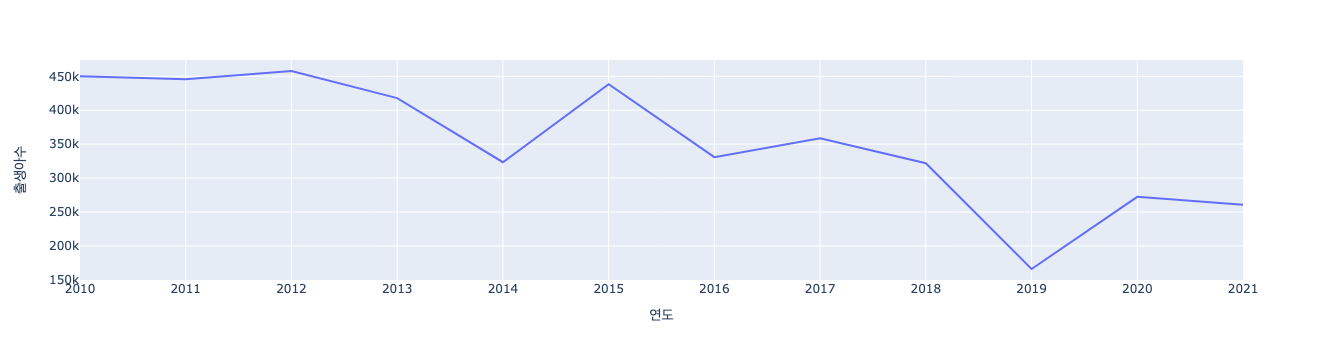

In [12]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역']).applymap(lambda x: float(x) if not x=='-' else 0)\
.drop('전국',axis=0)\
.stack().reset_index().set_axis(['지역','연도','출생아수'],axis=1)\
.groupby('연도').agg({'출생아수':'sum'}).reset_index()\
.plot.line(x='연도',y='출생아수',backend='plotly')

## C. 시각화2: 시도별 출생아수 시각화 (line)

/tmp/ipykernel_3662309/2812380636.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



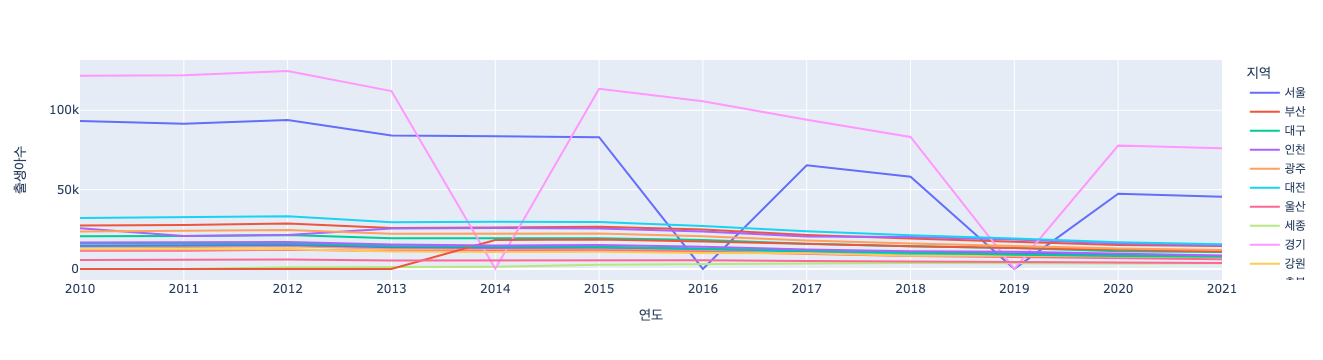

In [13]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역']).applymap(lambda x: float(x) if not x=='-' else 0)\
.drop('전국',axis=0)\
.stack().reset_index().set_axis(['지역','연도','출생아수'],axis=1)\
.plot.line(x='연도',y='출생아수',color='지역',backend='plotly')

## D. 시각화3: 시도별 출생아수 시각화 (area)

`-` 시각화1,시각화2의 정보가 적절히 혼합되어있는 시각화는 없을까? 

/tmp/ipykernel_3662309/4032629349.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



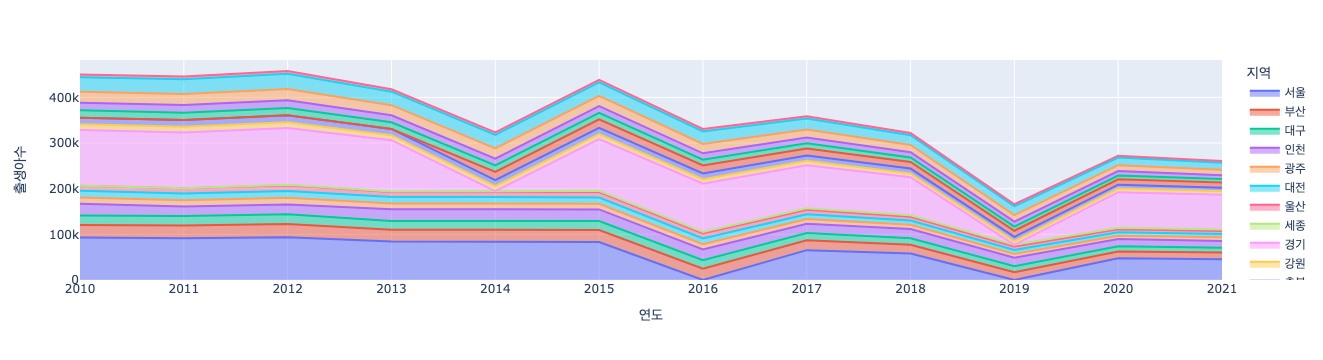

In [14]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역']).applymap(lambda x: float(x) if not x=='-' else 0)\
.drop('전국',axis=0)\
.stack().reset_index().set_axis(['지역','연도','출생아수'],axis=1)\
.plot.area(x='연도',y='출생아수',color='지역',backend='plotly')

- 기묘하다.. 

`-` 해석: 

`-` 데이터와 비교

In [15]:
df

지역/연도[6]    2010    2011        2012        2013        2014    2015  \
0        서울   93266   91526   93914.000   84066.000   83711.000   83005   
1        부산   27415   27759   28673.000   25831.000   26190.000   26645   
2        대구   20557   20758   21472.000   19340.000   19361.000   19438   
3        인천   25752   20758   21472.000   25560.000   25786.000   25491   
4        광주   13979   13916   14392.000   12729.000   12729.000   12441   
5        대전   14314   14808   15279.000   14099.000   13962.000   13774   
6        울산   11432   11542   12160.000   11330.000   11556.000   11732   
7        세종       -       -    1054.000    1111.000    1344.000    2708   
8        경기  121753  122027  124746.000  112129.000     112.169  113495   
9        강원   12477   12408   12426.000   10980.000   10662.000   10929   
10       충북   14670   14804   15139.000   13658.000   13366.000   13563   
11       충남  20.242  20.398      20.448      18.628   18200.000   18604   
12       전북   16100   16175   16238.000   14555.000   14231.000   14087   
13       전남   16654   16612   16990.000   15401.000   14817.000   15061   
14       경북   23700   24250   24635.000   22206.000   22062.000   22310   
15       경남   32203   32536   33211.000   29504.000   29763.000   29537   
16       제주    5657    5628    5992.000    5328.000    5526.000    5600   
17       전국  470171  471265  484550.000  436455.000  435435.000  438420   

          2016    2017    2018        2019    2020    2021  
0       75.536   65389   58074      53.673   47400   45531  
1    24906.000   21480   19152   17049.000   15100   14446  
2    18298.000   15946   14400   13233.000   11200   10661  
3    23609.000   20445   20087   18522.000   16000   14947  
4    11580.000   10120    9105    8364.000    7300    7956  
5    12436.000   10851    9337    8410.000    7500    7414  
6    10910.000    9381    8149    7539.000    6600    6127  
7     3297.000    3504    3703    3819.000    3500    3570  
8   105643.000   94088   83198      83.198   77800   76139  
9    10058.000    9958    8351    8283.000    7800    7357  
10   12742.000   11394   10586    9333.000    8600    8190  
11   17302.000   15670   14380   13228.000   11900   10984  
12   12698.000   11348   10001    8971.000    8200    7745  
13   13980.000   12354   11238   10832.000    9700    8430  
14   20616.000   17957   16079   14472.000   12900   12045  
15   27138.000   23849   21224   19250.000   16800   15562  
16    5494.000    5037    4781    4500.000    4000    3728  
17  406243.000  357771  326822  302676.000  272400  260562

## E. 시각화1,2,3 수정 

`-` 시각화1의 수정 

/tmp/ipykernel_3662309/2015504777.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/tmp/ipykernel_3662309/2015504777.py:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



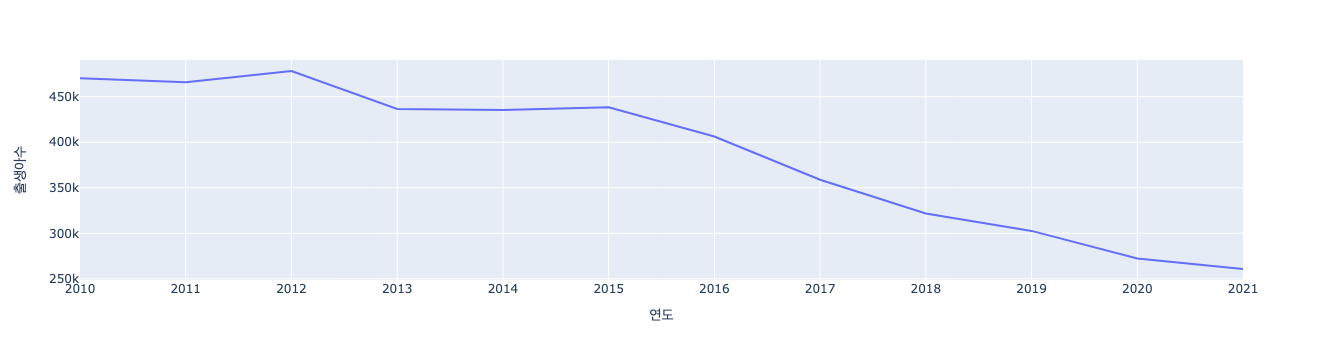

In [16]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역'])\
.applymap(lambda x: float(x) if not x=='-' else 0)\
.applymap(lambda x: x*1000 if x<1000 else x)\
.drop('전국',axis=0)\
.stack().reset_index().set_axis(['지역','연도','출생아수'],axis=1)\
.groupby('연도').agg({'출생아수':'sum'}).reset_index()\
.plot.line(x='연도',y='출생아수',backend='plotly')

`-` 시각화2의 수정 

/tmp/ipykernel_3662309/2415151748.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/tmp/ipykernel_3662309/2415151748.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



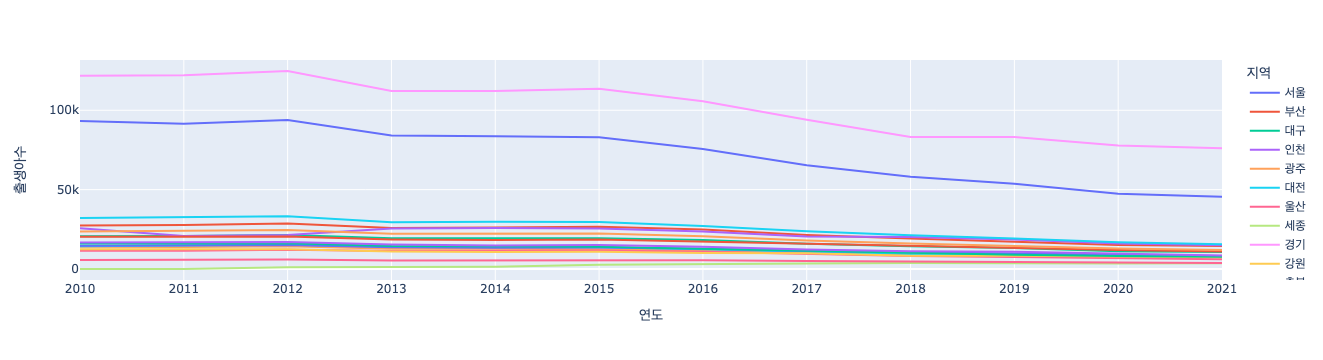

In [17]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역']).applymap(lambda x: float(x) if not x=='-' else 0)\
.applymap(lambda x: x*1000 if x<1000 else x)\
.drop('전국',axis=0)\
.stack().reset_index().set_axis(['지역','연도','출생아수'],axis=1)\
.plot.line(x='연도',y='출생아수',color='지역',backend='plotly')

`-` 시각화3의 수정 

/tmp/ipykernel_3662309/3995162225.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/tmp/ipykernel_3662309/3995162225.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



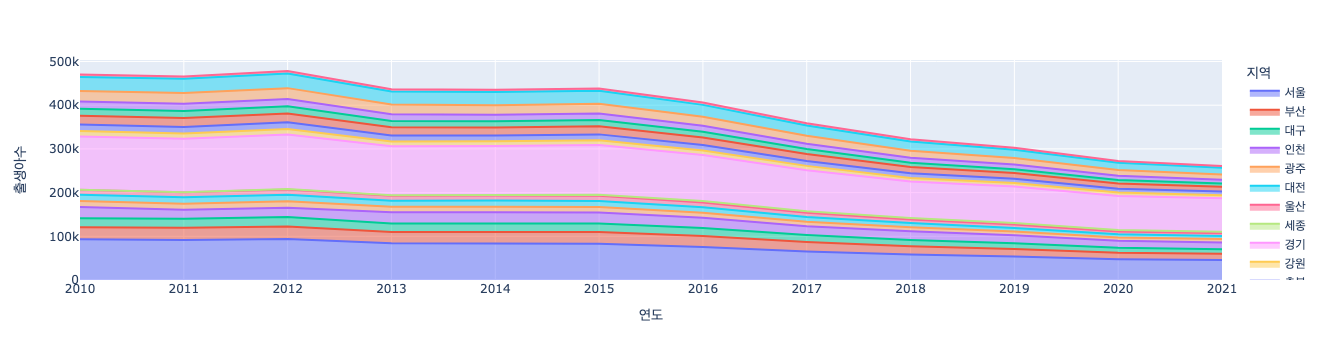

In [18]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역']).applymap(lambda x: float(x) if not x=='-' else 0)\
.applymap(lambda x: x*1000 if x<1000 else x)\
.drop('전국',axis=0)\
.stack().reset_index().set_axis(['지역','연도','출생아수'],axis=1)\
.plot.area(x='연도',y='출생아수',color='지역',backend='plotly')